---

# YZV 312E Data Mining
## Homework 1 

### Res. Asst. Yaren Yılmaz
---

Before starting, please read the instructions in the pdf file carefully. Do not delete or change any code line in the notebook.
In this homework you will analyze the airplane passenger data. Read README.txt file from the drive link to understand your dataset.

## Muhammed Ruşen Birben 150220755

In [1]:
import pandas as pd
import numpy as np

# For visualization. You are free to use one of them
import matplotlib.pyplot as plt
import seaborn as sns

# YOU CAN ONLY IMPORT LIBRARIES FOR ENCODING PART

## PART 1: Data Understanding
* Use the link to download the dataset.
https://drive.google.com/drive/folders/1Nt1lYqHQKJ1FogsUmdDk76bt9CIUYGQ6?usp=sharing

In [2]:
# Read CSV File
path =  ".//flight.csv" # Give your own path
df = pd.read_csv(path, index_col = 0)

In [3]:
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### 1.1 How many features and rows exist ?

In [4]:
rows = len(df.index) #FILL
features = len(df.columns) #FILL
print("# of Features: %d, # of Rows: %d" % (features, rows))

# of Features: 23, # of Rows: 129880


### 1.2 Create your own function describe() function
**Create a function called display_statistical_info(). It should take your dataframe as parameter and returns a new dataframe that includes the following features.** Assign **nan** for statistical values of columns with object dtype. <br>

* **Name**: name of the feature(column)<br>
* **Fill_Value**: number of rows non-missing rows<br>
* **#_Missing_Value** : how many missing value exist <br>
* **\%_Missing_Value**: percentage representation of missing values<br>
* **Data_Type**: data type of the feature<br>
* **#_Unique_Values**: how many unique values exist<br>
* **Unique_Values**: shows all the unique values as a list<br>

Below statistical information can be listed only for numerical features. You are expected to write your own mean, std functions. Do not use built-in mean, std functions.

* **Mean**: mean of values<br>
* **STD**: standard deviation<br>
* **Min**: minimum value<br>
* **Q1**: %25 of features<br>
* **Q2**: %25 of features<br>
* **Q3**: %75 of features<br>
* **Max**: minimum value<br>

In [5]:
def display_statistical_info(df):
    """
    Calculates the statistical information, missing values and unique values of the dataframe for each column
    Args: df: your dataframe 
    Returns: df_info with shape (23, 14) -> 14 information for 23 df columns
    """
    df_info = pd.DataFrame(columns=["Name","Fill_Value", "#_Missing_Value", "%_Missing_Value", "Data_Type", "#_Unique_Values", "Unique_Values", "Mean", "STD", "Min", "Q1", "Q2", "Q3", "Max"])
    N = len(df.index)
    
    for col in df.columns:

        Name = col
        Fill_Value = N - df[col].isna().sum()
        _Missing_Value =  df[col].isna().sum()
        P_Missing_Value = (_Missing_Value / (_Missing_Value + Fill_Value)) * 100
        Data_Type = df[col].dtype
        _Unique_Values = len(df[col].unique())
        Unique_Values = df[col].unique()
        
        
        if df[col].dtype == "O":
            Mean = np.nan
            STD = np.nan
            Min = np.nan
            Q1 = np.nan
            Q2 = np.nan
            Q3 = np.nan
            Max = np.nan       
        else:
            Mean = df[col].sum() / N
            STD = ((df[col].sort_values(ascending=False).apply(lambda x: (x-Mean)**2).sum()) / N) ** 0.5
            Min = df[col].min()
            Q1, Q2, Q3 =  df[col].sort_values(ascending=False).quantile([0.25,0.5,0.75])
            Max = df[col].max()
        
        df_info.loc[len(df_info.index)] = [Name,Fill_Value,_Missing_Value,P_Missing_Value,Data_Type,_Unique_Values,Unique_Values,Mean,STD,Min,Q1,Q2,Q3,Max]

    return df_info

In [6]:
df_info = display_statistical_info(df)

In [7]:
df_info

,Name,Fill_Value,#_Missing_Value,%_Missing_Value,Data_Type,#_Unique_Values,Unique_Values,Mean,STD,Min,Q1,Q2,Q3,Max
0,Gender,129880,0,0.000000,object,2,"[Male, Female]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,customer_type,129880,0,0.000000,object,2,"[Loyal Customer, disloyal Customer]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,age,129880,0,0.000000,int64,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3...",39.427957,15.119302,7.0,27.0,40.0,51.0,85.0
3,type_of_travel,129880,0,0.000000,object,2,"[Personal Travel, Business travel]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,customer_class,129880,0,0.000000,object,3,"[Eco Plus, Business, Eco]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,flight_distance,129880,0,0.000000,int64,3821,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 8...",1190.316392,997.448637,31.0,414.0,844.0,1744.0,4983.0
6,inflight_wifi_service,129880,0,0.000000,int64,6,"[3, 2, 4, 1, 5, 0]",2.728696,1.329335,0.0,2.0,3.0,4.0,5.0
7,departure_arrival_time_convenient,129880,0,0.000000,int64,6,"[4, 2, 5, 3, 1, 0]",3.057599,1.526736,0.0,2.0,3.0,4.0,5.0
8,ease_of_online_booking,129880,0,0.000000,int64,6,"[3, 2, 5, 4, 1, 0]",2.756876,1.401734,0.0,2.0,3.0,4.0,5.0
9,gate_location,129880,0,0.000000,int64,6,"[1, 3, 2, 5, 4, 0]",2.976925,1.278515,0.0,2.0,3.0,4.0,5.0


### 1.3 Decide Type of Attributes
* You can use the results of your describe function.
* Nominal, Ordinal, Interval, Binary, Discrete, Continuous ?

FILL THE RIGHT-SIDE OF THE FEATURES WITH THEIR TYPE <br>
Gender: Binary <br>
customer_type: Binary <br>
age: Ratio <br>
type_of_travel: Binary <br>
customer_class: Nominal <br>
flight_distance: Ratio <br>
inflight_wifi_service: Ordinal <br>
departure_arrival_time_convenient: Ordinal <br>
ease_of_online_booking: Ordinal <br>
gate_location: Ordinal <br>
food_and_drink: Ordinal <br>
online_boarding: Ordinal <br>
seat_comfort: Ordinal <br>
inflight_entertainment: Ordinal <br>
onboard_service: Ordinal <br>
leg_room_service: Ordinal <br>
baggage_handling: Ordinal <br>
checkin_service: Ordinal <br>
inflight_service: Ordinal <br>
cleanliness: Ordinal <br>
departure_delay_in_minutes: Ratio <br>
arrival_delay_in_minutes: Ratio <br>
satisfaction: Binary <br>

### 1.4 Correlation
#### Write your own correlation matrix
* In this part, you have to write your own correlation function.  You can use df.corr() **only** to compare your result. Implement the given pearson correlation formula to feature pairs. You are **only** allowed to use built-in mean, sum, sqrt methods. <br>
* Calculate correlation between each pair of features and fill the matrix
* Create dataframe using the matrix for better visualization with column names and indexes are the names of numeric columns
<br>
* You can use $round(correlation\_value, 6)$ for more understandable results after calculating the correlation value


In [8]:
def get_corr(series1, series2):
    """
    Gets pandas series as parameters and 
    returns the correlation of those series
    """
    mean1 = series1.mean()
    mean2 = series2.mean()
    a = series1 - mean1
    b = series2 - mean2
    return round((a*b).sum() / ( ((a*a).sum() * (b*b).sum()) ** 0.5), 6)
    

In [9]:
# dropped the nan including columns (only one column for this case) for being able to calculate correlation accurately
numeric_columns = df.dropna(axis=1).loc[:,(df.dtypes != "O")].columns

In [10]:
corr_matrix = np.zeros([len(numeric_columns), len(numeric_columns)])
for i, col1 in enumerate(numeric_columns):
    for j, col2 in enumerate(numeric_columns):
        corr_matrix[i][j] = get_corr(df[col1], df[col2])

In [11]:
df_corr = pd.DataFrame(corr_matrix, columns = numeric_columns, index= numeric_columns)
df_corr

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes
age,1.000000,0.099459,0.016116,0.036960,0.022565,-0.000398,0.023194,0.207572,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565,-0.009041
flight_distance,0.099459,1.000000,0.006701,-0.018914,0.065165,0.005520,0.057066,0.214825,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648,0.002402
inflight_wifi_service,0.016116,0.006701,1.000000,0.344915,0.714807,0.338573,0.132214,0.457445,0.121513,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300,-0.015946
departure_arrival_time_convenient,0.036960,-0.018914,0.344915,1.000000,0.437620,0.447510,0.000687,0.072287,0.008666,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.000778
ease_of_online_booking,0.022565,0.065165,0.714807,0.437620,1.000000,0.460041,0.030514,0.404866,0.028561,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,-0.005318
gate_location,-0.000398,0.005520,0.338573,0.447510,0.460041,1.000000,-0.002872,0.002756,0.002788,0.002741,-0.029019,-0.005181,0.000972,-0.039353,0.000310,-0.005918,0.005973
food_and_drink,0.023194,0.057066,0.132214,0.000687,0.030514,-0.002872,1.000000,0.233500,0.575846,0.623461,0.057404,0.033173,0.035321,0.085198,0.035210,0.658054,-0.029164
online_boarding,0.207572,0.214825,0.457445,0.072287,0.404866,0.002756,0.233500,1.000000,0.419253,0.283922,0.154242,0.123225,0.083541,0.204238,0.074058,0.329377,-0.019404
seat_comfort,0.159136,0.157662,0.121513,0.008666,0.028561,0.002788,0.575846,0.419253,1.000000,0.611837,0.130545,0.104272,0.074620,0.189979,0.068842,0.679613,-0.027999
inflight_entertainment,0.074947,0.130507,0.207802,-0.008380,0.046564,0.002741,0.623461,0.283922,0.611837,1.000000,0.418574,0.300397,0.379123,0.119554,0.406094,0.692511,-0.027012


In [12]:
df.corr()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
age,1.000000,0.099459,0.016116,0.036960,0.022565,-0.000398,0.023194,0.207572,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565,-0.009041,-0.011248
flight_distance,0.099459,1.000000,0.006701,-0.018914,0.065165,0.005520,0.057066,0.214825,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648,0.002402,-0.001935
inflight_wifi_service,0.016116,0.006701,1.000000,0.344915,0.714807,0.338573,0.132214,0.457445,0.121513,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300,-0.015946,-0.017749
departure_arrival_time_convenient,0.036960,-0.018914,0.344915,1.000000,0.437620,0.447510,0.000687,0.072287,0.008666,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.000778,-0.000942
ease_of_online_booking,0.022565,0.065165,0.714807,0.437620,1.000000,0.460041,0.030514,0.404866,0.028561,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,-0.005318,-0.007033
gate_location,-0.000398,0.005520,0.338573,0.447510,0.460041,1.000000,-0.002872,0.002756,0.002788,0.002741,-0.029019,-0.005181,0.000972,-0.039353,0.000310,-0.005918,0.005973,0.005658
food_and_drink,0.023194,0.057066,0.132214,0.000687,0.030514,-0.002872,1.000000,0.233500,0.575846,0.623461,0.057404,0.033173,0.035321,0.085198,0.035210,0.658054,-0.029164,-0.031715
online_boarding,0.207572,0.214825,0.457445,0.072287,0.404866,0.002756,0.233500,1.000000,0.419253,0.283922,0.154242,0.123225,0.083541,0.204238,0.074058,0.329377,-0.019404,-0.022730
seat_comfort,0.159136,0.157662,0.121513,0.008666,0.028561,0.002788,0.575846,0.419253,1.000000,0.611837,0.130545,0.104272,0.074620,0.189979,0.068842,0.679613,-0.027999,-0.030521
inflight_entertainment,0.074947,0.130507,0.207802,-0.008380,0.046564,0.002741,0.623461,0.283922,0.611837,1.000000,0.418574,0.300397,0.379123,0.119554,0.406094,0.692511,-0.027012,-0.030230


#### Plot heatmap using this matrix

* Plot a heatmap using the correlation matrix you calculated.

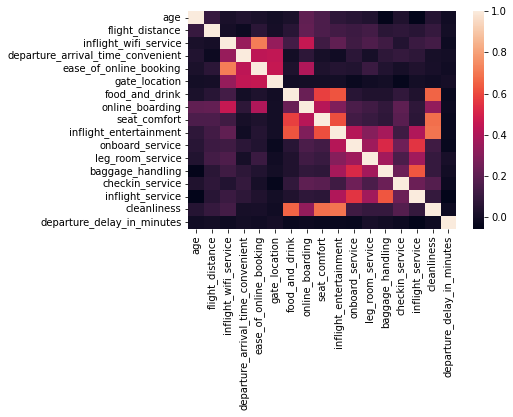

In [13]:
# plotting correlation heatmap
dataplot = sns.heatmap(df_corr, annot=False)
  
# displaying heatmap
plt.show()

#### Write down your interpretations about the correlation results.
* Compare your results with df.corr() result.
* Analyze and comment on correlation result on heatmap.


I didn't used arrival_delay_in_minutes feature because it had nan values and I didn't want to cause errors in our correlation calculations. Other than that our correltaion matrix and the built in one are pretty much the same.<br>
arrival_delay_in_minutes and departure_delay_in_minutes are higly correlated and they together wont contribute any  new knowledge (or very little knowledge) to our system. So one might want to drop arrival_delay_in_minutes. <br>
There are other correlated features (ease_of_online_booking and inflight_wifi_service --> 0.71, cleannes and food_and_drink --> 0.65) but their correlations are not higher than 0.75

#### Are there any highly correlated (>0.8) features ? How can we deal with highly correlated data ? Explain. Implement your solution.


In [14]:
# we can drop one of those correlated features
# arrival_delay_in_minutes and departure_delay_in_minutes are highlt correlated (as expected)
# we can drop arrival_delay_in_minutes it is better choice because it has missing values (Nan's)
df.drop("arrival_delay_in_minutes", axis =1, inplace=True)

## PART 2: Exploration & Visualization
* Do the following analysis

**1. Use pie chart to visualize your target variable "satisfaction".**

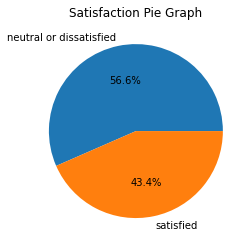

In [15]:
plt.pie(df['satisfaction'].value_counts().values, labels = df['satisfaction'].value_counts().index, autopct='%1.1f%%')
plt.title("Satisfaction Pie Graph")
plt.show()

**2. Analyze the relationship between customer_type and satisfaction columns. Use visualization.**

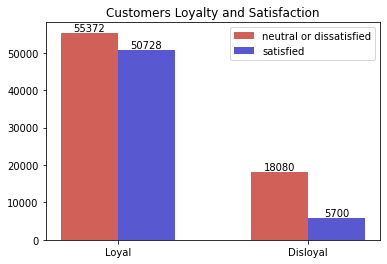

In [16]:
cst_types = [" - ".join(list(i)) for i in df.groupby('customer_type')['satisfaction'].value_counts().index]
ns = df.groupby('customer_type')['satisfaction'].value_counts().loc[:,"neutral or dissatisfied"]
s = df.groupby('customer_type')['satisfaction'].value_counts().loc[:,"satisfied"]

width = 0.6

barns = plt.bar(x=np.arange(len(ns))*2, height=ns,width=width, label="neutral or dissatisfied", color="#d16058")
bars = plt.bar(x=np.arange(len(s))*2+width, height=s,width=width, label="satisfied", color="#5858d1")

# lables are placed width/2 righter than red bars e.g. (np.arange(len(ns))*2)[0] is the left red bar, shift its x +width/2
plt.xticks(ticks=[(np.arange(len(ns))*2)[0]+width/2, (np.arange(len(ns))*2)[1]+width/2], labels=["Loyal","Disloyal"])

# adding numbers on top of bars
plt.bar_label(barns)
plt.bar_label(bars)

plt.legend()

plt.title("Customers Loyalty and Satisfaction")
plt.show()


#### disloyal customers dissatisfied / satisfied ratio is much more higher

**3. Plot histogram for Age column and write your analysis**

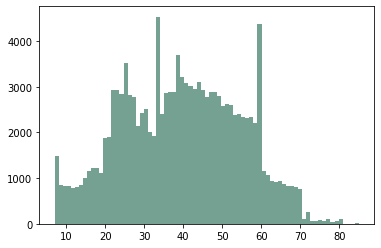

In [17]:
plt.hist(df['age'], bins=len(df['age'].unique()), color='#74a192')
plt.show()

## PART 3: Detect & Handle Outliers
* Detect the outliers in the columns "flight_distance", "departure_delay_in_minutes", "arrival_delay_in_minutes".
* Use visualization to detect outlier in the columns
1. For flight_distance:
    * Use IQR to detect outliers and boxplot to see the outliers.
    * Remove the outliers (Check the shape dataframe to show the outlier rows are deleted.)
2. For departure_delay_in_minutes:
3. For arrival_delay_in_minutes:


### 1. flight_distance

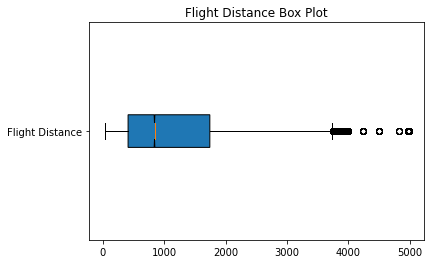

Shape before dropping:  129880
Shape after dropping:  127016


In [18]:
IQR = df['flight_distance'].quantile(0.75) - df['flight_distance'].quantile(0.25)
lower_b = df['flight_distance'].quantile(0.25) - 1.5*IQR
upper_b = df['flight_distance'].quantile(0.75) + 1.5*IQR
plt.boxplot(df['flight_distance'], vert=False, notch=True, patch_artist=True, labels=["Flight Distance"])
plt.title("Flight Distance Box Plot")
plt.show()

print("Shape before dropping: ", df.shape[0])
my_filter = (df['flight_distance'] > lower_b) & (df['flight_distance'] < upper_b)
df = df[my_filter]
print("Shape after dropping: ", df.shape[0])

### What is the most appropriate method to handle the outliers in the following features, why ? Interpret the importance of the features departure_delay_in_minutes, arrival_delay_in_minutes. Implement the most suitable method and explain your choice

### 2. departure_delay_in_minutes

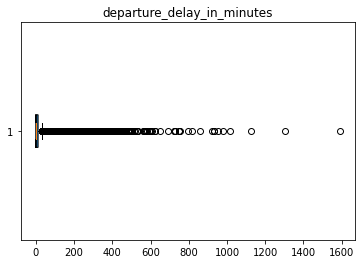

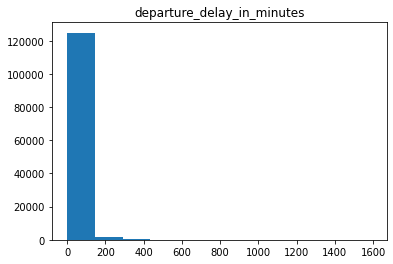

In [19]:
plt.boxplot(df['departure_delay_in_minutes'], vert=False, notch=True, patch_artist=True)
plt.title("departure_delay_in_minutes")
plt.show()
plt.hist(df['departure_delay_in_minutes'], bins=len(df['departure_delay_in_minutes'].unique())//40)
plt.title("departure_delay_in_minutes")
plt.show()

Using log transfrom is the most logical approach because our data is highly right skewed.<br> I've used log(x+1) because some x values were 0 and that could cause problem if I were to implement log(x) directly.

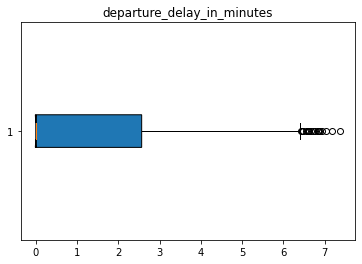

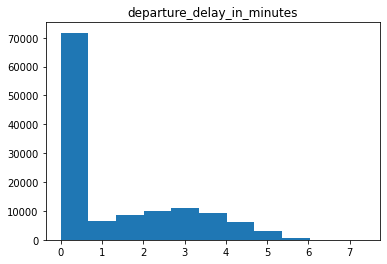

In [20]:
plt.boxplot(df['departure_delay_in_minutes'].apply(lambda x: np.log(x+1)), vert=False, notch=True, patch_artist=True)
plt.title("departure_delay_in_minutes")
plt.show()
plt.hist(df['departure_delay_in_minutes'].apply(lambda x: np.log(x+1)), bins=len(df['departure_delay_in_minutes'].apply(lambda x: np.log(x+1)).unique())//40)
plt.title("departure_delay_in_minutes")
plt.show()

In [21]:
df.loc[:,'departure_delay_in_minutes'] = df['departure_delay_in_minutes'].apply(lambda x: np.log(x+1))

### 3. arrival_delay_in_minutes

we could have done the same things with this column if it were not to be highly correlated with departure_delay_in_minutes <br>
and if we were not to drop (remove) it because of that.

### What other methods exist to detect outliers ? Write 2 of them.

1 - we could have used np.sqrt(x) as well for tranformation technique <br>
2 - we could have also used winsorize by importing: from scipy.stats.mstats import winsorize <br>
winsorizing is setting values below or above a certain percantile to that percantiles value <br>

### If there were outliers in categorical columns, how would you handle them ? Write 2 method.

There can't be any outliers for categorical values. Outliers are values that are 'far away' from the dense data point cluster. Distance can't be measured for categorical values. Thus there are no outliers for categorical values<br> If by saying 'outlier in categorical columns', <i>frequency of categories</i> is meant. We can eliminate some categories if their frequency is extremely low. <br> Or we can replace them using similar entries in the dataset by using techiques such as cosine similarity or minkowski distance etc.

## PART 4: Detect & Handle Missing Values

#### Which columns have missing values ? How many ? 
* Use the column "#_Missing_Values" column from dataframe which is created by your own describe function

None, 0 (we've dropped arrival_delay_in_minutes before because of high correlation)

#### Write 3 different Missing Value Handling Techniques. Implement the most appropriate one. Explain why you choose that method. 
* Make your changes inplace. Write the number of missing values in the columns after the implementation. It should be 0.

I've dropped the column that had missing values already because of the high correlation it had with another column.
This was an appropriate method because information carried in arrival_delay_in_minutes is still in departure_delay_in_minutes column

1. Drop the missing valued entry (either column or row) 
2. Impute missing values with mean or median
3. Use classification algorithms to predict missing entries

In [22]:
display_statistical_info(df)

,Name,Fill_Value,#_Missing_Value,%_Missing_Value,Data_Type,#_Unique_Values,Unique_Values,Mean,STD,Min,Q1,Q2,Q3,Max
0,Gender,127016,0,0.0,object,2,"[Male, Female]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,customer_type,127016,0,0.0,object,2,"[Loyal Customer, disloyal Customer]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,age,127016,0,0.0,int64,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3...",39.337068,15.169280,7.0,27.0,40.0,51.000000,85.000000
3,type_of_travel,127016,0,0.0,object,2,"[Personal Travel, Business travel]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,customer_class,127016,0,0.0,object,3,"[Eco Plus, Business, Eco]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,flight_distance,127016,0,0.0,int64,3554,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 8...",1129.452219,921.293649,31.0,408.0,814.0,1660.000000,3738.000000
6,inflight_wifi_service,127016,0,0.0,int64,6,"[3, 2, 4, 1, 5, 0]",2.728609,1.326732,0.0,2.0,3.0,4.000000,5.000000
7,departure_arrival_time_convenient,127016,0,0.0,int64,6,"[4, 2, 5, 3, 1, 0]",3.060756,1.527606,0.0,2.0,3.0,4.000000,5.000000
8,ease_of_online_booking,127016,0,0.0,int64,6,"[3, 2, 5, 4, 1, 0]",2.753551,1.399305,0.0,2.0,3.0,4.000000,5.000000
9,gate_location,127016,0,0.0,int64,6,"[1, 3, 2, 5, 4, 0]",2.976830,1.275779,0.0,2.0,3.0,4.000000,5.000000


## PART 5: Feature Engineering


### 5.1 Binning
* Implement two different binning techniques for "age" column. You are allowed to use pandas built-in functions for this part.
    1. **Equal-width Partitioning**
        * Choose number_of_bins = 10
        * Create new column called "equal_width_bin" and fill it with your bins
    2. **Equal-depth Partitioning**
        * Create new column called "equal_depth_bin" and fill it with your bins

In [23]:
max_v = df['age'].max()
min_v = df['age'].min()
bin_size = (max_v - min_v) / 10
bins = [min_v+(i*bin_size) for i in range(11)] # setting bin edges
labels = [i for i in range(10)]
# using cut method with the bin edges I've constructed
df['equal_width_bin'] = pd.cut(x = df['age'], bins = bins, labels = labels, include_lowest = True,right=True)

In [24]:
bins = [i/10 for i in range(11)]
# using quantile cuts seemd the most logical approach for equal depth binnig
df['equal_depth_bin'] = pd.qcut(x = df['age'].rank(method='first'), q = 10, labels = labels)



<b>Verification</b>

In [25]:
# printing the difference of max and min element of each bin
df.groupby('equal_width_bin')['age'].max() - df.groupby('equal_width_bin')['age'].min()

equal_width_bin
0    7
1    7
2    7
3    7
4    7
5    6
6    7
7    7
8    7
9    7
Name: age, dtype: int64

In [26]:
# printing the number of elements of each bin
df['equal_depth_bin'].value_counts()

0    12702
1    12702
3    12702
5    12702
7    12702
9    12702
2    12701
4    12701
6    12701
8    12701
Name: equal_depth_bin, dtype: int64

In [27]:
print(df['equal_depth_bin'].value_counts().sum())
print(df['equal_width_bin'].value_counts().sum())

127016
127016


### 5.2 Feature Extraction
* In this part, you will create new features using apply, groupby methods:
   

**1. Find the min, max, mean values of "baggage_handling", "checkin_service", "inflight_service", "cleanliness" columns for customer type group**

In [28]:
print("MINIMUMS")
print(df.groupby('customer_type')['baggage_handling'].min())
print(df.groupby('customer_type')['checkin_service'].min())
print(df.groupby('customer_type')['inflight_service'].min())
print(df.groupby('customer_type')['cleanliness'].min())


MINIMUMS
customer_type
Loyal Customer       1
disloyal Customer    1
Name: baggage_handling, dtype: int64
customer_type
Loyal Customer       0
disloyal Customer    1
Name: checkin_service, dtype: int64
customer_type
Loyal Customer       0
disloyal Customer    1
Name: inflight_service, dtype: int64
customer_type
Loyal Customer       0
disloyal Customer    1
Name: cleanliness, dtype: int64


In [29]:
print("MAXIMUMS")
print(df.groupby('customer_type')['baggage_handling'].max())
print(df.groupby('customer_type')['checkin_service'].max())
print(df.groupby('customer_type')['inflight_service'].max())
print(df.groupby('customer_type')['cleanliness'].max())

MAXIMUMS
customer_type
Loyal Customer       5
disloyal Customer    5
Name: baggage_handling, dtype: int64
customer_type
Loyal Customer       5
disloyal Customer    5
Name: checkin_service, dtype: int64
customer_type
Loyal Customer       5
disloyal Customer    5
Name: inflight_service, dtype: int64
customer_type
Loyal Customer       5
disloyal Customer    5
Name: cleanliness, dtype: int64


In [30]:
print("MEANS")
print(df.groupby('customer_type')['baggage_handling'].mean())
print(df.groupby('customer_type')['checkin_service'].mean())
print(df.groupby('customer_type')['inflight_service'].mean())
print(df.groupby('customer_type')['cleanliness'].mean())

MEANS
customer_type
Loyal Customer       3.613687
disloyal Customer    3.693726
Name: baggage_handling, dtype: float64
customer_type
Loyal Customer       3.320746
disloyal Customer    3.222657
Name: checkin_service, dtype: float64
customer_type
Loyal Customer       3.625047
disloyal Customer    3.700248
Name: inflight_service, dtype: float64
customer_type
Loyal Customer       3.331061
disloyal Customer    3.060556
Name: cleanliness, dtype: float64


**2. Create new features departure_delay_in_hours, arrival_delay_in_hours using departure_delay_in_minutes, arrival_delay_in_minutes. And drop departure_delay_in_minutes, arrival_delay_in_minutes**

In [31]:
# I've already dropped arrival_delay_in_minutes
df['departure_delay_in_hours'] = df['departure_delay_in_minutes'] / 60
df.drop('departure_delay_in_minutes', axis=1, inplace=True)

In [32]:
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction,equal_width_bin,equal_depth_bin,departure_delay_in_hours
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,neutral or dissatisfied,0,0,0.054302
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,neutral or dissatisfied,2,1,0.011552
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,satisfied,2,2,0.000000
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,neutral or dissatisfied,2,1,0.041415
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,satisfied,6,9,0.000000


**3. Create a new feature "perc_total_point" that calculates the percentage of service scores (ease_of_online_booking, gate_location, food_and_drink, online_boarding,	seat_comfort, inflight_entertainment, onboard_service, leg_room_service	, baggage_handling, checkin_service, inflight_service, cleanliness) (percentage = total_score / max_score we can give)**

In [33]:
feature_to_sum = ("ease_of_online_booking", "gate_location", "food_and_drink", "online_boarding", "seat_comfort", "inflight_entertainment", "onboard_service", "leg_room_service" , "baggage_handling", "checkin_service", "inflight_service", "cleanliness")
df['perc_total_point'] = pd.Series(sum(df[i] for i in feature_to_sum)/ len(feature_to_sum))

In [34]:
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction,equal_width_bin,equal_depth_bin,departure_delay_in_hours,perc_total_point
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,4,4,5,5,neutral or dissatisfied,0,0,0.054302,3.916667
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,5,3,1,4,1,neutral or dissatisfied,2,1,0.011552,2.250000
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,3,4,4,4,5,satisfied,2,2,0.000000,4.000000
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,5,3,1,4,2,neutral or dissatisfied,2,1,0.041415,2.916667
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,4,4,3,3,3,satisfied,6,9,0.000000,3.583333


**4. Create a new feature named "avg_age" which shows the mean age value for each customer_type**

In [35]:
avgs = df.groupby('customer_type').mean()['age']
df['avg_ages'] = df.apply(lambda x: avgs[x['customer_type']], axis=1)


In [36]:
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction,equal_width_bin,equal_depth_bin,departure_delay_in_hours,perc_total_point,avg_ages
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,4,5,5,neutral or dissatisfied,0,0,0.054302,3.916667,41.404395
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,3,1,4,1,neutral or dissatisfied,2,1,0.011552,2.250000,30.354290
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,4,4,5,satisfied,2,2,0.000000,4.000000,41.404395
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,3,1,4,2,neutral or dissatisfied,2,1,0.041415,2.916667,41.404395
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,4,3,3,3,satisfied,6,9,0.000000,3.583333,41.404395


**4. Create new column "custom_satisfaction_point" with the given conditions. In here, we are assuming, if flight_distance is bigger, it causes more dissatisfaction on customers' total_point that you created.**<BR>
        * If flight_distance is between [min,25\%), the total_point decrease the "total_point" by %5.<BR>
        * If flight_distance is between [25\%, 50\%), the total_point decrease the "total_point" by %10.<BR>
        * If flight_distance is between [50\%, 75\%), the total_point decrease the "total_point" by %15.<BR>
        * If flight_distance is between [75\%, max), the total_point decrease the "total_point" by %20.<BR>

In [37]:
# I used quantile cut to solve the problem
# when multilying though, I had to use .astype() method because labels are not considered numerically by default
remaining_prc_series = pd.qcut(x = df['flight_distance'].rank(method='first'), q = [0,0.25,0.5,0.75,1], labels = [0.95,0.9,0.85,0.8])
df['custom_satisfaction_point'] =  df['perc_total_point'] * remaining_prc_series.astype(float)

**5. CREATE A NEW FEATURE AND EXPLAIN THE MEANING OF IT.**

The <i>in_plane_satisfaction</i> feature consist of only the averages of plane related features.

In [38]:
in_plane_features = ['inflight_service', 'food_and_drink', 'seat_comfort', 'inflight_entertainment', 'leg_room_service', 'inflight_wifi_service']
df['in_plane_satisfaction'] = pd.Series(sum(df[i] for i in in_plane_features)/len(in_plane_features))

**6. Drop columns equal_width_bin and equal_depth_bin**

In [39]:
df.drop('equal_width_bin',axis=1, inplace=True)
df.drop('equal_depth_bin',axis=1, inplace=True)

### 5.3 Categorical to Numerical
* Convert categorical features to numerical values
* In this part, you are allowed to use pandas built-in functions.
* Make all the changes in-place

1. **Gender**, **customer_type**, **type_of_travel**, **satisfaction**: convert to 1-0 values


In [40]:
df.loc[:,'Gender'] = df['Gender'].map({'Male':1, 'Female':0}) 
df.loc[:,'customer_type'] =  df['customer_type'].map({'Loyal Customer':1, 'disloyal Customer':0}) 
df.loc[:,'type_of_travel'] = df['type_of_travel'].map({'Business travel':1, 'Personal Travel':0}) 
df.loc[:,'satisfaction'] = df['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0}) 

 2. **customer_class**: Which encoding method fits the best for this feature: Label Encoding, One-Hot Encoding, Ordinal Encoding ? Write your opinions. Implement it.
 

In [41]:
# Label encoding fits here, (though if we think that order of these categories are ordinal 
# and this order goes as 'Business'>'Eco Plus'>'Eco' this would be identical to Ordinal Encoding)
df.loc[:,'customer_class'] = df['customer_class'].map({'Business':2, 'Eco Plus':1, 'Eco':0})

## Part 6: Scaling & Splitting into Train/Test Sets

### 6.1 Scaling 
* Now your dataframe should include only numerical values. 
* Implement z-score Normalization (Standard Scaler)
* Implement it from scratch. Do not use built-in function for scaling, use your own mean, sqrt methods.
* Run "df.describe()" to see the min, mean, std, max value of your scaled dataframe

In [42]:
def return_zscore(my_array):
    N = len(my_array)
    mean = sum(my_array)/N
    sum_of_differences = my_array.apply(lambda x: (x-mean) ** 2 ).sum()
    STD = (sum_of_differences/N) ** 0.5
    zscores = my_array.apply(lambda x: (x-mean)/STD)
    return zscores
    

In [43]:
df_scaled = df.apply(lambda X: return_zscore(X))

In [44]:
df_scaled.describe()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction,departure_delay_in_hours,perc_total_point,avg_ages,custom_satisfaction_point,in_plane_satisfaction
count,1.270160e+05,1.270160e+05,1.270160e+05,1.270160e+05,1.270160e+05,1.270160e+05,1.270160e+05,1.270160e+05,1.270160e+05,1.270160e+05,...,1.270160e+05,1.270160e+05,1.270160e+05,1.270160e+05,1.270160e+05,1.270160e+05,1.270160e+05,1.270160e+05,1.270160e+05,1.270160e+05
mean,3.893507e-17,1.496427e-17,-2.131360e-16,-1.065120e-16,-1.030717e-16,2.500572e-17,1.698934e-16,1.221196e-16,7.336688e-17,1.594324e-16,...,1.401327e-16,-2.791466e-17,7.943650e-18,1.230706e-17,4.097693e-17,7.596765e-14,-6.236951e-14,-2.172794e-11,-5.958174e-14,-3.340931e-14
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-9.852601e-01,-2.084494e+00,-2.131747e+00,-1.471057e+00,-1.048178e+00,-1.192293e+00,-2.056639e+00,-2.003629e+00,-1.967798e+00,-2.333343e+00,...,-2.226531e+00,-2.606028e+00,-3.090708e+00,-2.493469e+00,-8.632385e-01,-7.625551e-01,-3.151710e+00,-2.084494e+00,-3.297383e+00,-3.039890e+00
25%,-9.852601e-01,4.797327e-01,-8.132929e-01,-1.471057e+00,-1.048178e+00,-7.830861e-01,-5.491756e-01,-6.943910e-01,-5.385177e-01,-7.656731e-01,...,-5.324891e-01,-2.386297e-01,-5.428027e-01,-9.732711e-01,-8.632385e-01,-7.625551e-01,-6.817069e-01,4.797327e-01,-6.943709e-01,-7.638634e-01
50%,-9.852601e-01,4.797327e-01,4.370229e-02,6.797832e-01,-8.934726e-03,-3.424014e-01,2.045560e-01,-3.977211e-02,1.761226e-01,1.816169e-02,...,3.145320e-01,-2.386297e-01,3.064992e-01,-2.131720e-01,-8.632385e-01,-7.625551e-01,5.929399e-02,4.797327e-01,4.833644e-02,6.378261e-02
75%,1.014960e+00,4.797327e-01,7.688521e-01,6.797832e-01,1.030308e+00,5.758726e-01,9.582876e-01,6.148468e-01,8.907628e-01,8.019964e-01,...,1.161553e+00,5.505029e-01,1.155801e+00,5.469271e-01,1.158428e+00,8.236966e-01,8.002949e-01,4.797327e-01,7.627501e-01,6.845171e-01
max,1.014960e+00,4.797327e-01,3.010224e+00,6.797832e-01,1.030308e+00,2.831397e+00,1.712019e+00,1.269466e+00,1.605403e+00,1.585831e+00,...,1.161553e+00,1.339635e+00,1.155801e+00,1.307026e+00,1.158428e+00,3.797390e+00,2.529297e+00,4.797327e-01,3.181854e+00,2.132898e+00


### 6.2 Splitting into Train/Test Sets
* Split your scaled dataset randomly into train and test set.
* Do not use built-in splitting methods such as sklearns train_test_split()
* 80% -> train set, 20% -> test split

In [45]:
train_number = round(0.8 * len(df.index))
test_number = len(df.index) - train_number
shuffled_df = df_scaled.sample(frac=1, random_state=13).reset_index()
df_test = shuffled_df[train_number:]
df_train = shuffled_df[:train_number]

In [46]:
 print(f"Split is %{(len(df_test) / (len(df_train) + len(df_test)) )*100}")

Split is %19.99984253952258


In [47]:
print("Shape of train set: ", df_train.shape)
print("Shape of test set: ", df_test.shape)
# Below output should be "Validation: True"
print("Validation: ", df_train.shape[0] + df_test.shape[0] == df_scaled.shape[0])

Shape of train set:  (101613, 27)
Shape of test set:  (25403, 27)
Validation:  True
